# Klasifikasi

Bagian ini digunakan untuk melakukan perbandingan akurasi klasifikasi menggunakan Naive Bayes dan Random forest pada dataset original (unbalanced), dataset setelah ADASYN, dan dataset setelah SMOTE.

In [1]:
%%capture
%run data-balancing.ipynb

ModuleNotFoundError: No module named 'pandas'

ModuleNotFoundError: No module named 'pandas'

### Function Train dan Evaluasi Model
Fungsi ini akan digunakan untuk training, testing, hingga mengukur akurasi model

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def latih_dan_evaluasi_model(model, X_data, y_data):
    """
    Fungsi untuk membagi data, melatih model, dan mengevaluasi akurasinya.
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X_data, y_data, test_size=0.2, random_state=42, stratify=y_data
    )

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

## Klasifikasi Naive Bayes

In [3]:
from sklearn.naive_bayes import GaussianNB

# Inisialisasi Model
naive_bayes_model = GaussianNB()

# Evaluasi pada Setiap Dataset
accuracy_original = latih_dan_evaluasi_model(naive_bayes_model, X, y)
accuracy_adasyn = latih_dan_evaluasi_model(naive_bayes_model, X_res_adasyn, y_res_adasyn)
accuracy_smote = latih_dan_evaluasi_model(naive_bayes_model, X_res_smote, y_res_smote)

# Tampilkan Hasil Perbandingan Akurasi
print("--- Perbandingan Akurasi Klasifikasi Naive Bayes ---")
print(f"Akurasi pada Data Original (Imbalanced): {accuracy_original:.4f}")
print(f"Akurasi pada Data setelah ADASYN:       {accuracy_adasyn:.4f}")
print(f"Akurasi pada Data setelah SMOTE:        {accuracy_smote:.4f}")

--- Perbandingan Akurasi Klasifikasi Naive Bayes ---
Akurasi pada Data Original (Imbalanced): 0.7941
Akurasi pada Data setelah ADASYN:       0.8478
Akurasi pada Data setelah SMOTE:        0.8428


## Klasifikasi Random Forest

In [4]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi Model Random Forest
random_forest_model = RandomForestClassifier(random_state=42)

# Evaluasi pada Setiap Dataset
accuracy_original_rf = latih_dan_evaluasi_model(random_forest_model, X, y)
accuracy_adasyn_rf = latih_dan_evaluasi_model(random_forest_model, X_res_adasyn, y_res_adasyn)
accuracy_smote_rf = latih_dan_evaluasi_model(random_forest_model, X_res_smote, y_res_smote)

# Tampilkan Hasil Perbandingan Akurasi
print("--- Perbandingan Akurasi Klasifikasi Random Forest ---")
print(f"Akurasi pada Data Original (Imbalanced): {accuracy_original_rf:.4f}")
print(f"Akurasi pada Data setelah ADASYN:       {accuracy_adasyn_rf:.4f}")
print(f"Akurasi pada Data setelah SMOTE:        {accuracy_smote_rf:.4f}")

--- Perbandingan Akurasi Klasifikasi Random Forest ---
Akurasi pada Data Original (Imbalanced): 0.8676
Akurasi pada Data setelah ADASYN:       0.9739
Akurasi pada Data setelah SMOTE:        0.9520


## Klasifikasi Ensemble Bagging
Bagian ini akan digunakan untuk menerapkan Ensemble Bagging menggunakan base model Naive Bayes dan Random Forest.

In [5]:
from sklearn.ensemble import BaggingClassifier

### Menggunakan base model Naive Bayes

In [6]:
# Base model
naive_bayes_model = GaussianNB()

# Inisialisasi Model Bagging Classifier
bagging_model = BaggingClassifier(estimator=naive_bayes_model, random_state=42)

# Evaluasi pada Setiap Dataset
accuracy_original_bagging_nb = latih_dan_evaluasi_model(bagging_model, X, y)
accuracy_adasyn_bagging_nb = latih_dan_evaluasi_model(bagging_model, X_res_adasyn, y_res_adasyn)
accuracy_smote_bagging_nb = latih_dan_evaluasi_model(bagging_model, X_res_smote, y_res_smote)

# Tampilkan Hasil Perbandingan Akurasi
print("--- Perbandingan Akurasi Klasifikasi Bagging Classifier ---")
print(f"Akurasi pada Data Original (Imbalanced): {accuracy_original_bagging_nb:.4f}")
print(f"Akurasi pada Data setelah ADASYN:       {accuracy_adasyn_bagging_nb:.4f}")
print(f"Akurasi pada Data setelah SMOTE:        {accuracy_smote_bagging_nb:.4f}")

--- Perbandingan Akurasi Klasifikasi Bagging Classifier ---
Akurasi pada Data Original (Imbalanced): 0.8971
Akurasi pada Data setelah ADASYN:       0.8435
Akurasi pada Data setelah SMOTE:        0.8472


c:\Users\Muhammad Junaidi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
c:\Users\Muhammad Junaidi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
c:\Users\Muhammad Junaidi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
c:\Users\Muhammad Junaidi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])


### Menggunakan base model Random Forest

In [7]:
# Base model
random_forest = RandomForestClassifier(random_state=42)

# Inisialisasi Model Bagging Classifier
bagging_model = BaggingClassifier(estimator=random_forest, random_state=42)

# Evaluasi pada Setiap Dataset
accuracy_original_bagging_rf = latih_dan_evaluasi_model(bagging_model, X, y)
accuracy_adasyn_bagging_rf = latih_dan_evaluasi_model(bagging_model, X_res_adasyn, y_res_adasyn)
accuracy_smote_bagging_rf = latih_dan_evaluasi_model(bagging_model, X_res_smote, y_res_smote)

# Tampilkan Hasil Perbandingan Akurasi
print("--- Perbandingan Akurasi Klasifikasi Bagging Classifier ---")
print(f"Akurasi pada Data Original (Imbalanced): {accuracy_original_bagging_rf:.4f}")
print(f"Akurasi pada Data setelah ADASYN:       {accuracy_adasyn_bagging_rf:.4f}")
print(f"Akurasi pada Data setelah SMOTE:        {accuracy_smote_bagging_rf:.4f}")

--- Perbandingan Akurasi Klasifikasi Bagging Classifier ---
Akurasi pada Data Original (Imbalanced): 0.8971
Akurasi pada Data setelah ADASYN:       0.9652
Akurasi pada Data setelah SMOTE:        0.9563


## Perbandingan Akurasi Klasifikasi

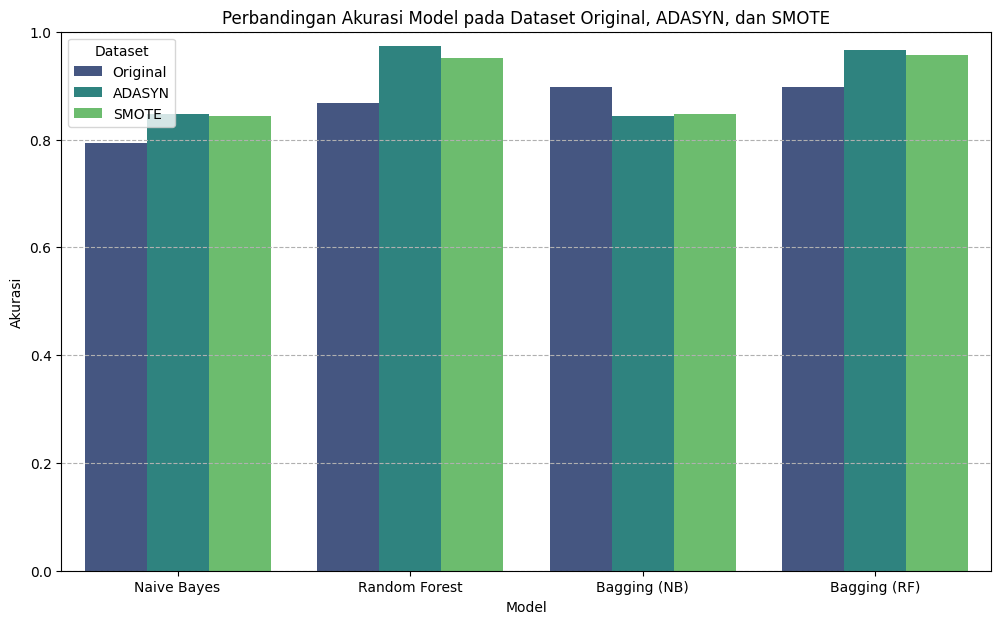

In [8]:
data = {
    'Model': ['Naive Bayes', 'Naive Bayes', 'Naive Bayes',
              'Random Forest', 'Random Forest', 'Random Forest',
              'Bagging (NB)', 'Bagging (NB)', 'Bagging (NB)',
              'Bagging (RF)', 'Bagging (RF)', 'Bagging (RF)'],
    'Dataset': ['Original', 'ADASYN', 'SMOTE',
                'Original', 'ADASYN', 'SMOTE',
                'Original', 'ADASYN', 'SMOTE',
                'Original', 'ADASYN', 'SMOTE'],
    'Accuracy': [accuracy_original, accuracy_adasyn, accuracy_smote,
                 accuracy_original_rf, accuracy_adasyn_rf, accuracy_smote_rf,
                 accuracy_original_bagging_nb, accuracy_adasyn_bagging_nb, accuracy_smote_bagging_nb,
                 accuracy_original_bagging_rf, accuracy_adasyn_bagging_rf, accuracy_smote_bagging_rf] # Assuming the last bagging results are for RF base
}

df_accuracy = pd.DataFrame(data)

plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='Accuracy', hue='Dataset', data=df_accuracy, palette='viridis')
plt.title('Perbandingan Akurasi Model pada Dataset Original, ADASYN, dan SMOTE')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
plt.legend(title='Dataset')
plt.grid(axis='y', linestyle='--')
plt.show()

In [9]:
# Tampilkan Hasil Perbandingan Akurasi
print("--- Perbandingan Akurasi Klasifikasi Naive Bayes ---")
print(f"Akurasi pada Data Original (Imbalanced): {accuracy_original:.4f}")
print(f"Akurasi pada Data setelah ADASYN:       {accuracy_adasyn:.4f}")
print(f"Akurasi pada Data setelah SMOTE:        {accuracy_smote:.4f}")

# Tampilkan Hasil Perbandingan Akurasi
print("\n--- Perbandingan Akurasi Klasifikasi Random Forest ---")
print(f"Akurasi pada Data Original (Imbalanced): {accuracy_original_rf:.4f}")
print(f"Akurasi pada Data setelah ADASYN:       {accuracy_adasyn_rf:.4f}")
print(f"Akurasi pada Data setelah SMOTE:        {accuracy_smote_rf:.4f}")

# Tampilkan Hasil Perbandingan Akurasi
print("\n--- Perbandingan Akurasi Klasifikasi Bagging Classifier (Naive Bayes) ---")
print(f"Akurasi pada Data Original (Imbalanced): {accuracy_original_bagging_nb:.4f}")
print(f"Akurasi pada Data setelah ADASYN:       {accuracy_adasyn_bagging_nb:.4f}")
print(f"Akurasi pada Data setelah SMOTE:        {accuracy_smote_bagging_nb:.4f}")


# Tampilkan Hasil Perbandingan Akurasi
print("\n--- Perbandingan Akurasi Klasifikasi Bagging Classifier (Random Forest) ---")
print(f"Akurasi pada Data Original (Imbalanced): {accuracy_original_bagging_rf:.4f}")
print(f"Akurasi pada Data setelah ADASYN:       {accuracy_adasyn_bagging_rf:.4f}")
print(f"Akurasi pada Data setelah SMOTE:        {accuracy_smote_bagging_rf:.4f}")

--- Perbandingan Akurasi Klasifikasi Naive Bayes ---
Akurasi pada Data Original (Imbalanced): 0.7941
Akurasi pada Data setelah ADASYN:       0.8478
Akurasi pada Data setelah SMOTE:        0.8428

--- Perbandingan Akurasi Klasifikasi Random Forest ---
Akurasi pada Data Original (Imbalanced): 0.8676
Akurasi pada Data setelah ADASYN:       0.9739
Akurasi pada Data setelah SMOTE:        0.9520

--- Perbandingan Akurasi Klasifikasi Bagging Classifier (Naive Bayes) ---
Akurasi pada Data Original (Imbalanced): 0.8971
Akurasi pada Data setelah ADASYN:       0.8435
Akurasi pada Data setelah SMOTE:        0.8472

--- Perbandingan Akurasi Klasifikasi Bagging Classifier (Random Forest) ---
Akurasi pada Data Original (Imbalanced): 0.8971
Akurasi pada Data setelah ADASYN:       0.9652
Akurasi pada Data setelah SMOTE:        0.9563


## Kesimpulan

Berdasarkan hasil klasifikasi menggunakan `Naive Bayes`, `Random Forest`, dan `Bagging Classifier` pada dataset `Ecoli` sebelum dan sesudah balancing dengan `ADASYN` dan `SMOTE`, dapat disimpulkan beberapa hal:

**Naive Bayes:**
Model Naive Bayes menunjukkan peningkatan akurasi setelah data diseimbangkan, terutama dengan SMOTE.

**Random Forest:**
Random Forest memberikan akurasi yang lebih tinggi dibandingkan Naive Bayes pada semua kondisi. Balancing data dengan ADASYN dan SMOTE secara signifikan meningkatkan performa Random Forest.

**Bagging Classifier (dengan base model Naive Bayes):**
Bagging dengan Naive Bayes menunjukkan akurasi yang baik pada data original, namun peningkatannya setelah balancing tidak sebesar Random Forest.

**Bagging Classifier (dengan base model Random Forest):**
Bagging dengan Random Forest sebagai base model juga menunjukkan peningkatan akurasi yang signifikan setelah balancing, mendekati performa Random Forest tanpa bagging.

**Klasifikasi menggunakan dan tanpa Bagging pada Random Forest** menghasilkan nilai akurasi yang sama disebabkan Random Forest sendiri adalah algoritma ensemble yang secara internal menggunakan prinsip bagging.

**Kesimpulan Akhir:**
Secara umum, balancing data menggunakan ADASYN dan SMOTE berhasil meningkatkan akurasi klasifikasi pada dataset Ecoli yang tidak seimbang. Model Random Forest menunjukkan performa terbaik di antara model yang diuji, baik sebelum maupun sesudah balancing. Penerapan Bagging Classifier dengan Random Forest sebagai base model juga memberikan hasil yang baik, meskipun tidak selalu lebih tinggi dari Random Forest tunggal setelah balancing. SMOTE tampaknya memberikan sedikit keunggulan dalam meningkatkan akurasi dibandingkan ADASYN pada kasus ini.